In [96]:
import pandas
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import classifiers
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.tokenize import word_tokenize #import word_tokenize for tokenizing text into words 
import csv
from textblob import TextBlob
from nltk.corpus import stopwords

In [99]:
countpos = 0
countneutral = 0
countneg = 0
countsentence = 0
infile = 'tweet_product.csv'

def stemmingEnglish(str):
    porter_stemmer = PorterStemmer()
    words = word_tokenize(str)
    result = list()
    for word in words:
        result.append(porter_stemmer.stem(word))
        
    return ' '.join(result)


with open(infile, 'r', encoding="utf8") as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[0]
        print(sentence)
        sentence = sentence.lower() #casefolding
        sentence = re.sub('@[^\s]+','',sentence)   #removeMention
        sentence = re.sub(r"http\S+", '', sentence)  #removeLink
        sentence = re.sub('#\S+', '', sentence)  #removeHashtag
        sentence = re.sub('RT|cc', '', sentence)  #removeRT/cc
        sentence = re.sub('[^a-zA-Z]', " ", sentence) #removeSymbol
        sentence = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', sentence) #removeOneChar
        sentence = re.sub("\s\s+" , " ", sentence) #removeMultiSpace
        sentence = stemmingEnglish(sentence)

        blob = TextBlob(sentence)
        print (sentence)
        print (blob.sentiment.polarity, blob.sentiment.subjectivity)
        if blob.sentiment.polarity > 0 :
            print ("POSITIF")
            countpos=countpos+1
        elif blob.sentiment.polarity == 0 :
            print ("NEUTRAL")
            countneutral=countneutral+1
        else :
            print ("NEGATIF")
            countneg=countneg+1
        print("")
        
        countsentence = countsentence+1
        


tweet_text
tweet text
0.0 0.0
NEUTRAL

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
have iphon after hr tweet at it wa dead need to upgrad plugin station at
-0.2 0.4
NEGATIF

@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
know about awesom ipad iphon app that you ll like appreci for it design also they re give free ts at
0.4 0.8
POSITIF

@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.
can not wait for also they should sale them down at
-0.15555555555555559 0.2888888888888889
NEGATIF

@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw
hope thi year festiv isn as crashi as thi year iphon app
0.0 0.0
NEUTRAL

@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)
great stuff on

NEUTRAL

Headed to #sxsw and want to share/gather contact info? {link} can turn your iphone into a... {link}
head to and want to share gather contact info link can turn your iphon into link
0.0 0.0
NEUTRAL

BTW - The #sxsw Apple store is sold out of all 3G models (VZW &amp; AT&amp;T).
btw the appl store is sold out of all model vzw amp at amp
0.0 0.0
NEUTRAL

Must have #SXSW app! RT @mention Lovely review from Forbes for our SXSW iPad app Holler Gram - {link}
must have app rt love review from forb for our sxsw ipad app holler gram link
0.5 0.6
POSITIF

Temporary #sxsw apple store. Apple being sneaky as usual  {link}
temporari appl store appl be sneaki as usual link
-0.25 0.25
NEGATIF

Anyone at #sxsw been by the pop-up Apple store in Austin? That's gotta be a hopping place today.
anyon at been by the pop up appl store in austin that got ta be hop place today
0.0 0.0
NEUTRAL

‰ÛÏ@mention #sxsw beta testing interactive book for iPad app by Moonbot studios out of Louisiana.  Cool app.‰Û


0.0 0.0
NEUTRAL

if u have a iPhone you don't need a car'-use zimride etc to share rides #sxsw #shareable
if have iphon you don need car use zimrid etc to share ride
0.0 0.0
NEUTRAL

I've seen a lot of tablets here, every single one of them is an iPad. #SXSW
ve seen lot of tablet here everi singl one of them is an ipad
0.0 0.0
NEUTRAL

Receiving a lot of @mention messages telling me I'm sexy in response to my post looking to meet fellow Christian iPhone devs at #sxsw
receiv lot of messag tell me sexi in respons to my post look to meet fellow christian iphon dev at
0.0 0.0
NEUTRAL

Picked up a Mophie battery case 4 my iPhone in prep for #SXSW. Not lugging around a laptop &amp; only using my phone was a huge win last year.
pick up mophi batteri case my iphon in prep for not lug around laptop amp onli use my phone wa huge win last year
0.4000000000000001 0.45555555555555555
POSITIF

Now thats a NEWS :P RT@mention Google to Launch Major New Social Network Called Circles, Possibly Today {li

0.0 0.0
NEUTRAL

&quot;The Apple store at the mall on Sunday is 10x as crowded as this. This line is fake. I just need a fucking dongle.&quot; Genius let me in. #sxsw
quot the appl store at the mall on sunday is as crowd as thi thi line is fake just need fuck dongl quot geniu let me in
-0.45 0.8
NEGATIF

2wks only Apple Store in 6th Austin street is now opened. #sxsw
wk onli appl store in th austin street is now open
0.0 0.5
NEUTRAL

A special Apple store: opening at 6th and Congress for SXSW &amp; ipad 2 launch. www.apple.com/retail/thedomain/  #Apple #iPad2 #sxsw #fb
special appl store open at th and congress for sxsw amp ipad launch www appl com retail thedomain
0.17857142857142858 0.5357142857142857
POSITIF

Makeshift apple store at 6th and congress. You're kidding me. Amazing #sxsw #apple
makeshift appl store at th and congress you re kid me amaz
0.0 0.0
NEUTRAL

Temporary Apple store at #sxsw - huge line. {link}
temporari appl store at huge line link
0.4000000000000001 0.9
POSITI

0.0 0.25
NEUTRAL

Nice find by RSQ's @mention {link} #sxsw #iPad #app
nice find by rsq link
0.6 1.0
POSITIF

The South By Southwest Panels, Illustrated [PICS]: Sometimes the best... {link} #News #Ogilvy #sxsw #trending #Cyber #iPhone
the south by southwest panel illustr pic sometim the best link
1.0 0.3
POSITIF

My Google calendar's Saturday night is a giant overlap of #sxsw parties.
my googl calendar saturday night is giant overlap of parti
0.0 1.0
NEUTRAL

&quot;You can Google Canadian Tuxedo and lose yourself for hours&quot; #sxsw
quot you can googl canadian tuxedo and lose yourself for hour quot
0.0 0.0
NEUTRAL

If anyone can make it cooler, they can. RT @mention @mention to Launch &quot;Groupon/ Living Social-type&quot; Rewards #SXSW {link}
if anyon can make it cooler they can rt to launch quot groupon live social type quot reward link
0.08484848484848484 0.2833333333333333
POSITIF

Exciting, can‰Ûªt wait! RT @mention Apple is opening up a temporary store in downtown Austin for #S

see facebook and googl as competit via
0.0 0.0
NEUTRAL

#SXSW has fantastic schedule app for iphone! Bummer I am still crackberry!
ha fantast schedul app for iphon bummer am still crackberri
0.0 0.0
NEUTRAL

Photo: By far, the best #sxsw accessory is an ipad. Followed closely by a margarita. ;-) {link}
photo by far the best aessori is an ipad follow close by margarita link
0.55 0.65
POSITIF

One of my fav photos of #SXSW so far @mention &amp;  @mention #google #SXSW {link}
one of my fav photo of so far amp link
0.1 1.0
POSITIF

Watch out FB 4 big brother RT@mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
watch out fb big brother rt googl to launch major new social network call circl possibl today link
0.05804924242424242 0.2803030303030303
POSITIF

I think I fell a bit more in love with #google today. Thanks for throwing the nerd party at the speakeasy during #SxSW
think fell bit more in love with today thank for throw the nerd parti at the

googl to launch major new social network call circl possibl today link goog
0.0773989898989899 0.34040404040404043
POSITIF

‰ÛÏ@mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw‰Û Dejavu all over again.
googl to launch major new social network call circl possibl today link dejavu all over again
0.0773989898989899 0.34040404040404043
POSITIF

‰ÛÏ@mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw‰Û sta, nije im dosta GBuzz-a?
googl to launch major new social network call circl possibl today link sta nije im dosta gbuzz
0.0773989898989899 0.34040404040404043
POSITIF

‰ÛÏ@mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw‰Û te dije wey @mention
googl to launch major new social network call circl possibl today link te dije wey
0.0773989898989899 0.34040404040404043
POSITIF

‰ÛÏ@mention Google to Launch Major New Social Network Called Circles, Possibly Today {

0.0 0.0
NEUTRAL

This Week in #iPad clip: @mention joins @mention to review the free #SXSW Go #App! {link} #iPad2 #SXSWGo
thi week in clip join to review the free go link
0.4 0.8
POSITIF

If you're in a room full of people w/good Wi-Fi at #SXSW run #FrostWire on your Android {link} Share pics, apps, vids w/others
if you re in room full of peopl good wi fi at run on your android link share pic app vid other
0.3083333333333333 0.5083333333333334
POSITIF

If you're in a room full of people w/good Wi-Fi at #SXSW run #FrostWire on your Android {link} share pics, apps, vids w/others
if you re in room full of peopl good wi fi at run on your android link share pic app vid other
0.3083333333333333 0.5083333333333334
POSITIF

Hot spots in Austin on Gowalla right now: convention cnt, the Ignite party n the Apple store. #sxsw #sxswi
hot spot in austin on gowalla right now convent cnt the ignit parti the appl store
0.26785714285714285 0.6928571428571428
POSITIF

I will be in Austin this weekend @me

0.03333333333333333 0.06666666666666667
POSITIF

Google to launch a social network, Circles, at #SxSW - {link} - Who's excited?
googl to launch social network circl at link who excit
0.03333333333333333 0.06666666666666667
POSITIF

Google to launch Circles social network at #sxsw? {link}
googl to launch circl social network at link
0.03333333333333333 0.06666666666666667
POSITIF

Google to Launch Major New Social Network Called &quot;Circles&quot; - {link} #sxsw /via @mention @mention /cc @mention @mentionc
googl to launch major new social network call quot circl quot link via
0.0773989898989899 0.34040404040404043
POSITIF

Google to Launch Major New Social Network Called #Circles - {link} &gt; Update: No preview planned at #SXSW
googl to launch major new social network call link gt updat no preview plan at
0.0773989898989899 0.34040404040404043
POSITIF

Google to Launch Major New Social Network Called Circles  {link} #sxsw (via @mention
googl to launch major new social network call ci

Is Google launching its own social network? Definitely not at ##sxsw. But rumor still has it...{link}  #googlecircles
is googl launch it own social network definit not at but rumor still ha it link
0.31666666666666665 0.5333333333333333
POSITIF

We're not launching any products at #SXSW but we're doing plenty else. Join us for #H4ckers &amp; 80s dancing today {link}
we re not launch ani product at but we re do plenti els join us for amp danc today link
0.0 0.0
NEUTRAL

Wikitude, Layar, FLAR tools, Argon, and Google Goggles- augmented reality browsers, tools &amp; apps to check out. #sxsw #eduar
wikitud layar flar tool argon and googl goggl augment realiti browser tool amp app to check out
0.0 0.0
NEUTRAL

I was too lazy to google it. #SXSW
wa too lazi to googl it
0.0 0.0
NEUTRAL

Hope they leave it up after #SXSW RT @mention Apple Opening Pop-Up Store In Austin For SXSW {link} by @mention
hope they leav it up after rt appl open pop up store in austin for sxsw link by
0.0 0.5
NEUTRAL

C

what the name of the song link ipad
0.0 0.0
NEUTRAL

Why do we need a &quot;page flip effect&quot; -‰ÛÏlike having a fake needle on a cd-player‰Û  #tapworthy #sxsw #iPad
whi do we need quot page flip effect quot like have fake needl on cd player
-0.5 1.0
NEGATIF

Hm? Do we need another 1? RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
hm do we need anoth rt googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

What do u need? @mention Groups challenged with coming up with iPhone app to solve parenting issues #sxsw #worklifeprogress
what do need group challeng with come up with iphon app to solv parent issu
0.0 0.0
NEUTRAL

.@mention needs the help of a badass android developer right now for a debugging emergency. Know anyone? @mention him. #SXSW
need the help of badass android develop right now for debug emerg know anyon him
0.2857142857142857 0.5357142857142857
POSITIF



Google is setting up a bunch of computers at their #SXSW trade show exhibit. Premiere of Google Circles? {link}
googl is set up bunch of comput at their trade show exhibit premier of googl circl link
0.0 0.0
NEUTRAL

I've seen several people working on iPad 2s at #SXSW today.
ve seen sever peopl work on ipad at today
0.0 0.0
NEUTRAL

There's a short line building at the flash Apple store downtown. People want their new iPads. #SXSW
there short line build at the flash appl store downtown peopl want their new ipad
0.06818181818181818 0.37727272727272726
POSITIF

C40: Nice Shot {link} [codes valid: 8:00-11:59:59p 03/14/11] #infektd #sxsw #cvdc
c nice shot link code valid p
0.6 1.0
POSITIF

exclusive shot of #SXSW popup Apple Store! {link}
exclus shot of popup appl store link
0.0 0.0
NEUTRAL

I guess i should say I told you so!
Apple is opening up a temporary store in downtown Austin for #SXSW &amp; iPad 2 launch {link}
guess should say told you so appl is open up temporari store in downt

Unloading the iPads  {link} #sxsw #apple #ipad2
unload the ipad link
0.0 0.0
NEUTRAL

It's like the Ipoo app for iphone!  @mention Ha! RT @mention 4chan is the Internet's bathroom wall. #sxswmoot #SXSW
it like the ipoo app for iphon ha rt chan is the internet bathroom wall
0.0 0.0
NEUTRAL

Z27: I Am the Law {link} [codes valid: 4:00-7:59:59p 03/13/11] #infektd #sxsw #zlf
z am the law link code valid p
0.0 0.0
NEUTRAL

Walked by the mobile Apple store in austin.  Line was insane. #sxsw
walk by the mobil appl store in austin line wa insan
0.0 0.0
NEUTRAL

Picked up the mophie juice boost pack for iPhone today. This chick -and weekend- calls for ample juice #SXSW
pick up the mophi juic boost pack for iphon today thi chick and weekend call for ampl juic
0.0 0.0
NEUTRAL

PdaNet is the most awesome app yet for the android! #sxsw @mention likes!
pdanet is the most awesom app yet for the android like
0.5 0.5
POSITIF

Check out the new @mention app {link} - this is gonna be HUGE next week at #s

appl pop up store for whi not pop up geniu bar everywher
0.0 0.0
NEUTRAL

Apple pop up store... line is ridic. #sxsw  {link}
appl pop up store line is ridic link
0.0 0.0
NEUTRAL

Trying to update software (4.0) on iPhone to download #sxsw app. But so far no luck - wonder if it's because phone is from Mexico.
tri to updat softwar on iphon to download app but so far no luck wonder if it becaus phone is from mexico
0.1 1.0
POSITIF

Def could use an iPad for  #SXSW today. Tweeting via iPhone sorta pretty much sux.
def could use an ipad for today tweet via iphon sorta pretti much sux
0.2 0.2
POSITIF

Brilliant use case! #SXSW &quot;@mention ...kik concierge service is great. Get @mention for android or iPhone and add the sxsw user &amp; ask away&quot;
brilliant use case quot kik concierg servic is great get for android or iphon and add the sxsw user amp ask away quot
0.8500000000000001 0.875
POSITIF

You won't use glasses? Lies. Lies. It's a phone on your face people. It's a handsfree conne


Ideas? RT: @mention Groups were challenged with coming up with an iPhone app to solve their parenting/start-up issues #sxsw
idea rt group were challeng with come up with an iphon app to solv their parent start up issu
0.0 0.0
NEUTRAL

Sweet! RT: @mention RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
sweet rt rt googl to launch major new social network call circl possibl today link
0.14554924242424241 0.4178030303030303
POSITIF

#SXSW (2): #gamification, #iPad #design, mobile #banking &amp; #marketing 2.0 {link} #artikelen #dossiers #events #mediapers
mobil amp link
0.0 0.0
NEUTRAL

#brandnew: #Google tries the social network again. This time it's #Circles to be launched @mention #SXSW. Perhaps wha‰Û_ (cont) {link}
tri the social network again thi time it to be launch perhap wha cont link
0.03333333333333333 0.06666666666666667
POSITIF

Nice Move: Apple set to open popup shop in core of #SXSW action {link}
nice move appl set to open p

goodguid iphon app scan barcod to rank environment respons of the compani nice pressur
-0.10000000000000003 0.95
NEGATIF

i think i'm getting ready to order an iPad 2 with the $$ i would have had to spend to attend #SXSW
think get readi to order an ipad with the would have had to spend to attend
0.0 0.0
NEUTRAL

I think I'm going to get a second iPhone just to view Push Notifications. #sxsw
think go to get second iphon just to view push notif
0.0 0.0
NEUTRAL

In fact I'm going to assume a priori everyone sitting in this departure terminal playing with an Apple product is going to #SXSW
in fact go to assum priori everyon sit in thi departur termin play with an appl product is go to
0.0 0.0
NEUTRAL

reasons i'm sad i'm not at #sxsw 1. @mention in the form of {link}
reason sad not at in the form of link
-0.5 1.0
NEGATIF

I think I'm the only one @mention #SxSW with an iPhone 3
think the onli one with an iphon
0.0 0.0
NEUTRAL

Dude, you're at an Outkast concert and you're tweeting from an 

POSITIF

@mention @mention Similarily, Tweetcaster for Android lets you zip tweets w annoying hash tags, like #sxsw
similarili tweetcast for android let you zip tweet annoy hash tag like
0.0 0.0
NEUTRAL

I want a @mention SO bad for #sxsw, would make our live blogging from the iPad so much more efficient. Beautiful case!! Beats my leather 1
want so bad for would make our live blog from the ipad so much more effici beauti case beat my leather
-0.021212121212121165 0.5555555555555555
NEGATIF

Watch as @mention scores the @mention search showdown at #SXSW: {link}
watch as score the search showdown at link
0.0 0.0
NEUTRAL

Woohoo! ‰ÛÏ@mention Standing in line. For the 6th time. #ipad2 #apple #sxsw #popupstore‰Û
woohoo stand in line for the th time
0.0 0.0
NEUTRAL

Woot! RT @mention So @mention just spilled the beans: next platform for Flipboard is the iPhone. Team started working on it. #sxflip #SXSW
woot rt so just spill the bean next platform for flipboard is the iphon team start work o

Going to #SXSW? Join Google &amp; YouTube for special events &amp; more: {link} #googlesxsw
go to join googl amp youtub for special event amp more link
0.4285714285714286 0.5357142857142857
POSITIF

Going to #sxsw? Need a lift from the airport? Register for the FREE @mention shuttle! {link}
go to need lift from the airport regist for the free shuttl link
0.4 0.8
POSITIF

Going to #SXSW? Plan to visit the #EMC booth for your chance to win an iPad! @mention @mention
go to plan to visit the booth for your chanc to win an ipad
0.8 0.4
POSITIF

Going to #SXSW? Sign up for Filmaster iPhone app with code &quot;SXSW&quot; to get a cool t-shirt on site: {link}
go to sign up for filmast iphon app with code quot sxsw quot to get cool shirt on site link
0.35 0.65
POSITIF

Going to #SXSW? The new iPhone guide to #Austin by @mention is free March 9-15. Hard to beat free. #lp
go to the new iphon guid to by is free march hard to beat free
0.16117424242424244 0.6490530303030304
POSITIF

At #sxsw #tapwo

video ipad line walk austin texa did you get one today link
0.0 0.0
NEUTRAL

Is the iPad 2 out yet in USA? Or will it be during #SxSW?
is the ipad out yet in usa or will it be dure
0.0 0.0
NEUTRAL

Win an iPad 2! via @mention Video ClipCon! See intro reel at {link} #sxsw #suasxsw #sxswaccel #entrepreneur #smallbiz #ceokidschat
win an ipad via video clipcon see intro reel at link
0.8 0.4
POSITIF

RT Download 20+ FREE tracks from the #SXSW Music Sampler available on the @mention store today! {link}
rt download free track from the music sampler avail on the store today link
0.4 0.8
POSITIF

writer iPad app {link} saved my ass on flight &amp; each bigger #SXSW panel - good job @mention @mention :) {link}
writer ipad app link save my ass on flight amp each bigger panel good job link
0.35 0.55
POSITIF

Dawn's iPad App of the Week is up early to help you prep for #SXSW: {link}
dawn ipad app of the week is up earli to help you prep for link
0.0 0.0
NEUTRAL

Win an iPad at SXSW via @mention #sx


At #SXSW and want to win an iPad? Get on the case with @mention @mention and @mention
at and want to win an ipad get on the case with and
0.8 0.4
POSITIF

Was he standing? Talented... RT @mention eww &amp; LOL. RT @mention Just saw a guy tweeting on his iPad while peeing...This is #sxsw
wa he stand talent rt eww amp lol rt just saw guy tweet on hi ipad while pee thi is
0.8 0.7
POSITIF

@mention android dev #sxsw @mention {link}
android dev link
0.0 0.0
NEUTRAL

Complete Android Guide (print) on sale at #sxsw bookstore today: $15. Include 99-cent upgrade to 2.4/3.0-ready ebook. Signing at 4:30!
complet android guid print on sale at bookstor today includ cent upgrad to readi ebook sign at
0.0 0.0
NEUTRAL

@mention Android just got a big call out at #sxsw in they #gamelayer opening keynote. I knew you'd appreciate.
android just got big call out at in they open keynot knew you appreci
0.0 0.3
NEUTRAL

@mention Android needs a way to group apps like you can now do with iPad/iPod. #SXSW #hh

0.13636363636363635 0.5
POSITIF

Another late start at #sxsw #sxswi damn you google and your rocking 80's party
anoth late start at damn you googl and your rock parti
-0.3 0.6
NEGATIF

The Spasmatics are rockin' it at the ACLU / Google party. #sxsw
the spasmat are rockin it at the aclu googl parti
0.0 0.0
NEUTRAL

Why has latin America not produced the next @mention or @mention ? #Latism #latam #sxsw
whi ha latin america not produc the next or
0.0 0.0
NEUTRAL

Great location choice, and nice timing for iPad2 launch: #Apple, #HP 'popping' in for #SXSW {link}
great locat choic and nice time for ipad launch pop in for link
0.7 0.875
POSITIF

Congratulation! RT @mention Yes! Gowalla wins best Andoid app at the Team Android Choice Awards. Thanks all! #sxsw
congratul rt ye gowalla win best andoid app at the team android choic award thank all
0.9 0.35
POSITIF

@mention atleast you are at #sxsw. I'm not there AND I have no Ipad. #doubleloser
atleast you are at not there and have no ipad
0.0 0.

RT NicoRiccelli: Google to Launch Major New Social Network Called Circles. {link}  #sxsw // Google denies this.
rt nicorielli googl to launch major new social network call circl link googl deni thi
0.0773989898989899 0.34040404040404043
POSITIF

Clear +succinct visions make for great UX (think Apple, Google, Intuit)-we've seemed to forget the 'heart' of caring/purpose #sxsw #rhjr_ux5
clear suinct vision make for great ux think appl googl intuit we ve seem to forget the heart of care purpos
0.45 0.5666666666666667
POSITIF

Open-source geo-hashing coming soon from @mention being used by @mention developers called S2 #SXSW
open sourc geo hash come soon from be use by develop call
0.0 0.5
NEUTRAL

LiquidSpace Launches iPhone App, Mobile Marketplace for Workspace #sxsw | @mention {link}
liquidspac launch iphon app mobil marketplac for workspac link
0.0 0.0
NEUTRAL

#techcrunch #google Chris Sacca Tweets Out A Fake #SXSW Beta Invite, Follower Swarm Ensues: 
... {link} #facebook @mention
chri

POSITIF

Best Brand Marketing at #SXSW: GE @mention solar powered carousel, @mention Rock 'n Roll Trailer Park, Apple's iPad2 pop-up shop
best brand market at ge solar power carousel rock roll trailer park appl ipad pop up shop
1.0 0.3
POSITIF

Just added my #SXSW flights to @mention Matching people on planes/airports. Also downloaded the @mention iPhone app, nicely done.
just ad my flight to match peopl on plane airport also download the iphon app nice done
0.6 1.0
POSITIF

Just found out new mapquest iPhone app has turn-by-turn gps for free... Time to check it out and get reacquainted with mq #sxsw
just found out new mapquest iphon app ha turn by turn gp for free time to check it out and get reacquaint with mq
0.2681818181818182 0.6272727272727273
POSITIF

You should probably put that away... RT @mention at the Android party and kinda embarrassed by my iPhone #SXSW
you should probabl put that away rt at the android parti and kinda embarrass by my iphon
0.0 0.0
NEUTRAL

Aha! Found pro


This schedule is heavier than my laptop. Where's my ipad already? #sxsw
thi schedul is heavier than my laptop where my ipad alreadi
0.0 0.0
NEUTRAL

#sxsw hardware. iPad #rickshaw bag, #lunatik, #incase iPhone4 battery pak, flip, Nike+, Bose buds, sprint mifi, ‰Û_ {link}
hardwar ipad bag iphon batteri pak flip nike bose bud sprint mifi link
0.0 0.0
NEUTRAL

Kinda giddy about #TheIndustryParty with #Google (&amp; more) at #GSDM. Finally, the fun comes to us non #SWSurrogates. #sxsw #notpouting
kinda giddi about with amp more at final the fun come to us non
0.26666666666666666 0.5666666666666667
POSITIF

Google body beta uber  #SXSW #health2dev #cool
googl bodi beta uber
0.0 0.0
NEUTRAL

We're ready for you @mention ! This is where the magic happens- @mention us, use the #zazzlesxsw hashtag and create your own iPhone case! #sxsw
we re readi for you thi is where the magic happen us use the hashtag and creat your own iphon case
0.55 1.0
POSITIF

Can anybody get the #SXSW mobile apps to wo

0.3333333333333333 0.6666666666666666
POSITIF

every time u hold yur ipad 2 up in the air to snap a pic it reminds me of a priest holding up a bible. except designed in california. #sxsw
everi time hold yur ipad up in the air to snap pic it remind me of priest hold up bibl except design in california
0.0 0.0
NEUTRAL

Great! See u there  RT @mention I'll be at the Austin Convention Center today w/ my @mention fam... showing my new iPhone game. #SXSW
great see there rt ll be at the austin convent center today my fam show my new iphon game
0.1090909090909091 0.42613636363636365
POSITIF

Foursquare ups the game, just in time for #SXSW {link} - Still prefer @mention by far, best looking Android app to date.
foursquar up the game just in time for link still prefer by far best look android app to date
0.2333333333333333 0.5666666666666667
POSITIF

All iphone users kill yo self if u hated on ubertwitter New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW
all iphon user

wonder when googl be demo now will becom part of googl analyt
0.0 0.0
NEUTRAL

Pretty even split between Android and iPhone at #sxsw this year.
pretti even split between android and iphon at thi year
0.0 0.0
NEUTRAL

#Smmnextgen Tools on the cheap: google analytics+excel+buzzmetrics.  Also Radian6 and Altimeter.  #sxsw #sloansxsw
tool on the cheap googl analyt excel buzzmetr also radian and altimet
0.4 0.7
POSITIF

If you aren't at google you just missed the dance party of a lifetime #SXSW
if you aren at googl you just miss the danc parti of lifetim
0.0 0.0
NEUTRAL

#SXSW haven't trend this time because of the tsunami..the iPad 2 did though.
haven trend thi time becaus of the tsunami the ipad did though
0.0 0.0
NEUTRAL

Rocking pen&amp;paper for the Google doodle talk at #sxsw
rock pen amp paper for the googl doodl talk at
0.0 0.0
NEUTRAL

#SXSW attendees - need one of the best QR scanner/creators on your iPhone? Send us a pic of a QR code you found for a free copy of Optiscan
attende 

ever wonder how googl map captur those street view link
0.0 0.0
NEUTRAL

Mega tether iPhone/Android party with @mention and @mention . #chargin2diffphonesatonce #dorkinout #sxsw
mega tether iphon android parti with and
0.0 0.0
NEUTRAL

Brown Paper is coming down on the windows of the #SXSW PopUp Apple Store.  {link}
brown paper is come down on the window of the popup appl store link
-0.15555555555555559 0.2888888888888889
NEGATIF

Gamechanger like Wave and Buzz no doubt RT @mention Google to Launch Major New Social Network Called Circles {link} #sxsw
gamechang like wave and buzz no doubt rt googl to launch major new social network call circl link
0.0773989898989899 0.34040404040404043
POSITIF

Ha! Another mention for Apple Store: {link} - RT @mention Temporary #Apple store on 6th and Congress for #sxsw, along w...
ha anoth mention for appl store link rt temporari store on th and congress for along
0.0 0.0
NEUTRAL

It is never more apparent than at #sxsw how nice it would be if apple ma

kicking off w/ @mention talking iPad design headaches #sxsw
kick off talk ipad design headach
0.0 0.0
NEUTRAL

Why is wifi working on my laptop but neither that nor 3g on my iphone? grrr. #sxsw
whi is wifi work on my laptop but neither that nor on my iphon grrr
-0.7 0.8
NEGATIF

Z20: Verification {link} [codes valid: 8:00-11:59:59a 03/13/11] #infektd #sxsw #zlf
z verif link code valid a
0.0 0.0
NEUTRAL

Hope its filtering will be intuitive (via @mention Google to Launch Major New Social Network Called Circles... {link} #sxsw
hope it filter will be intuit via googl to launch major new social network call circl link
0.0773989898989899 0.34040404040404043
POSITIF

The next fin serv battle is vs Apple, GOOG, Mobile operators. They have consumer loyalty and tons of cash (vs. Banks) #bankinnovate #SXSW
the next fin serv battl is vs appl goog mobil oper they have consum loyalti and ton of cash vs bank
0.0 0.0
NEUTRAL

u should find @mention ask 4 eric RT @mention Looking fwd  iPad DJ @mention

-0.1125 0.2375
NEGATIF

@mention Google and Lego teamed up 4 showdown at #SXSW w/ 14 teams of developers making #bots w/ mindstorm. 2nite they fight 12am #gsdm
googl and lego team up showdown at w team of develop make w mindstorm nite they fight am
0.0 0.0
NEUTRAL

All your Google belong to us? #sxsw {link}
all your googl belong to us link
0.0 0.0
NEUTRAL

My #sxsw Google calendar is getting a little out of control
my googl calendar is get littl out of control
0.0 0.0
NEUTRAL

@mention Google Circles by @mention stresses context, not sharing with everyone. #sxsw
googl circl by stress context not share with everyon
0.0 0.0
NEUTRAL

@mention Google Circles will be Lame. #sxsw &lt;3
googl circl will be lame lt
-0.5 0.75
NEGATIF

@mention Google Circles will be widely publicized as the next Facebook and then be completely forgotten about by the end of next week. #sxsw
googl circl will be wide public as the next facebook and then be complet forgotten about by the end of next week
-0.025 0.1

EightBit Hits The Street Running With HTML5 Power; SXSW Just Got A Lot More Fun {link} #iPhone #NES #SXSW #TheStreet
eightbit hit the street run with html power sxsw just got lot more fun link
0.4 0.35
POSITIF

@mention Hmmm... thinking about borrowing an iPad from work for taking notes at #SXSW. Works well enough that I don't have to lug the MBP?
hmmm think about borrow an ipad from work for take note at work well enough that don have to lug the mbp
0.0 0.5
NEUTRAL

@mention Hmmmm {link} #SXSW #Apple
hmmmm link
0.0 0.0
NEUTRAL

Well, Cashmore just gave the new iPad a crushing non-endorsement. #sxsw #checkins #ouch
well cashmor just gave the new ipad crush non endors
0.13636363636363635 0.45454545454545453
POSITIF

Cue the choir music #SXSW  @mention Apple Store, SXSW {link}
cue the choir music appl store sxsw link
0.0 0.0
NEUTRAL

these #iphone #android apps will keep you grooving at #SXSW {link}
these app will keep you groov at link
0.0 0.0
NEUTRAL

RIP my iPhone 4: June 2010 -  #SXS

say ye facebook and googl are implement it which brighten the futur good impact search too
0.7 0.6000000000000001
POSITIF

@mention I'm experimenting doing #SXSW with just a paper notebook, iPad and iPhone. No &quot;traditional&quot; laptop.
experi do with just paper notebook ipad and iphon no quot tradit quot laptop
0.0 0.0
NEUTRAL

@mention I'm glad I don't have an iPad 2 ... I think. #sxsw
glad don have an ipad think
0.5 1.0
POSITIF

@mention I'm going to #SXSW let's meet up! I can't use @mention yet because I have an Android phone but show me how it works!
go to let meet up can use yet becaus have an android phone but show me how it work
0.0 0.0
NEUTRAL

I'm know I'm going to Austin tomorrow but my iPhone is definitely trying to convince me I'm going to Autism. #sxsw
know go to austin tomorrow but my iphon is definit tri to convinc me go to autism
0.0 0.0
NEUTRAL

@mention I'm guessing there will not be an #Android app in time for #SXSW?
guess there will not be an app in time for
0

0.0 0.0
NEUTRAL

Circles will be circus RT @mention Google Circles will be ______    #sxsw
circl will be circu rt googl circl will be
0.0 0.0
NEUTRAL

#Google Will Connect the #Digital &amp; Physical Worlds Through #Mobile {link} via @mention  #sxsw
will connect the amp physic world through link via
0.0 0.0
NEUTRAL

Content will move back to the browser. Why replicate the work on an iPad when u can press one button? @mention @mention #sxsw
content will move back to the browser whi replic the work on an ipad when can press one button
0.0 0.0
NEUTRAL

My 1st #Billboard article: Apple, Spotify, Pandora: Tech Invades Austin @mention SXSWi 2011 {link} #SxSW
my st articl appl spotifi pandora tech invad austin sxswi link
0.0 0.0
NEUTRAL

Marissa Miller of Google makes shout out to the  Khan Academy and the great things they're doing for education. #fmsignal #sxsw (cc @mention
marissa miller of googl make shout out to the khan academi and the great thing they re do for educ
0.8 0.75
POSITIF

J

POSITIF

I Added Linkedin =) -  HootSuite Mobile for #SXSW ~ Updates for iPhone, BlackBerry &amp; Android {link}
ad linkedin hootsuit mobil for updat for iphon blackberri amp android link
0.0 0.0
NEUTRAL

&quot;brains are to zombies what content is to google, they can't get enough&quot; #sxsw #contentrules
quot brain are to zombi what content is to googl they can get enough quot
0.0 0.5
NEUTRAL

GroupMe Wins Best Group Messaging App at SXSWi {link} #FastSociety #iPhone #iPhone4 #SXSW #TexasEvery
groupm win best group messag app at sxswi link
0.9 0.35
POSITIF

#sxsw begins w/an ADD panel: hyperactivity &amp; distraction-I've used my iPad, iPhone, and BB multiple times in the last 5min #workinprogress
begin an add panel hyperact amp distract ve use my ipad iphon and bb multipl time in the last min
0.0 0.06666666666666667
NEUTRAL

{link} Coinsidence? Sounds like a good strategy to me. Wish I could go to #SXSW
link coinsid sound like good strategi to me wish could go to
0.55 0.5
POSITIF

@

is there alreadi line for the ipad that just arriv
0.0 0.0
NEUTRAL

So where is this temporary apple store setup? #sxsw
so where is thi temporari appl store setup
0.0 0.0
NEUTRAL

How Cool is this! #Apple opening a temporary store for the #iPad2 launch and #SXSW {link}
how cool is thi open temporari store for the launch and link
0.175 0.575
POSITIF

@mention is working on an tablet/iPad app! No demo yet, but they are excited. #sxsw #sxswmobileapps #AccessSXSW
is work on an tablet ipad app no demo yet but they are excit
0.0 0.0
NEUTRAL

Loving this! Hello, Holler Gram for iPad {link} via @mention #SXSW
love thi hello holler gram for ipad link via
0.5 0.6
POSITIF

#notsurprised lots of Geosocial news today w/ #sxsw beginning - Google fires a shot at Foursquare with check in rewards {link}
lot of geosoci news today begin googl fire shot at foursquar with check in reward link
0.0 0.0
NEUTRAL

I'm surprised the local news in Austin hasn't mentioned the traffic implications of the Apple pop-

0.65 0.45
POSITIF

Join {link} Most friends in ur city @mention end of #SXSW wins an iPad 2! C'mon @mention Help our @mention chng the world!
join link most friend in ur citi end of win an ipad mon help our chng the world
0.65 0.45
POSITIF

The hannukah miracle of the morning: uncharged iPhone still at 55% battery #sxsw
the hannukah miracl of the morn uncharg iphon still at batteri
0.0 0.0
NEUTRAL

Google take 3. Google Circles may be announced today at #SXSW. Their third try at #SocialNetworking. {link}
googl take googl circl may be announc today at their third tri at link
0.0 0.0
NEUTRAL

I feel like a Badass. @mention gave me a free drink. #SXSW
feel like badass gave me free drink
0.4 0.8
POSITIF

sounds like a job for #sxsw RT @mention Some detail about the new Bomb It iPhone App would love some early adopters! {link}
sound like job for rt some detail about the new bomb it iphon app would love some earli adopt link
0.34545454545454546 0.48484848484848486
POSITIF

sounds like a job 

POSITIF

Man, Google *should* launch Circles at #SXSW. Talk about striking while the iron is hot. | @mention @mention
man googl should launch circl at talk about strike while the iron is hot
0.25 0.8500000000000001
POSITIF

Lovin apple &amp; ipad2
#apple #austin #SXSW
lovin appl amp ipad
0.0 0.0
NEUTRAL

#sxsw Apple #iPad2 line took less than 10 minutes.
appl line took less than minut
-0.16666666666666666 0.06666666666666667
NEGATIF

Cant handle #SxSW traffic? RT @mention Dear @mention your own app for iPhone has sucked all day. #crashing
cant handl traffic rt dear your own app for iphon ha suck all day
0.6 1.0
POSITIF

Love Google Analytics! Thanks to the followers at #SXSW who took the time to check out my new post!
love googl analyt thank to the follow at who took the time to check out my new post
0.3181818181818182 0.5272727272727272
POSITIF

Hope people ask the tough questions. RT @mention Reminder: Android and Chrome TTS talk @mention 1 PM today!  {link}  #sxsw
hope peopl ask the

&lt;Nice lil sizzle reel&gt; #SXSW: By the numbers (VIDEO) {link} #music #socialmedia
lt nice lil sizzl reel gt by the number video link
0.6 1.0
POSITIF

First in line @mention #sxsw @mention store for the #ipad2!! (@mention Apple Store, SXSW) [pic]: {link}
first in line store for the appl store sxsw pic link
0.25 0.3333333333333333
POSITIF

10:30 AM line at Apple pop-up store in Austin. It opens at 5 PM. #sxsw {link}
am line at appl pop up store in austin it open at pm link
0.0 0.5
NEUTRAL

The long line at the Ginger Man's bathroom just saved me $829. The #SXSW pop-up Apple store closed right at midnight (as I walked up).
the long line at the ginger man bathroom just save me the pop up appl store close right at midnight as walk up
0.11785714285714285 0.46785714285714286
POSITIF

141st in line for #ipad2 at #SXSW (@mention Apple Store, SXSW w/ 38 others) {link}
st in line for at appl store sxsw other link
-0.125 0.375
NEGATIF

Mad long line for Google party at Maggie Mae's. Hope it's 

veri time rt bing search engin share continu to rise up to googl still top at link
0.5 0.5
POSITIF

Hmm....only 9? #SXSW right-brain #mwrc11 left-brain?? :) RT @mention @mention at #SXSW 9 out of 10 attendees have Mac or iPad
hmm onli right brain left brain rt at out of attende have mac or ipad
0.14285714285714285 0.26785714285714285
POSITIF

It was only a matter of time -Googleto launch a social network May called Google Circles? {link} via @mention #sxsw
it wa onli matter of time googleto launch social network may call googl circl link via
0.03333333333333333 0.06666666666666667
POSITIF

You finally get everyone to buy in to Facebook and then Google introduces Circle. No fair. Stop with all the innovation, people #sxsw
you final get everyon to buy in to facebook and then googl introduc circl no fair stop with all the innov peopl
-0.175 0.95
NEGATIF

You finally get everyone to buy in to Facebook and then Google introduces Circles. No fair. Stop with all the innovation, people #sxsw
y

0.6000000000000001 0.6000000000000001
POSITIF

Yup. RT @mention My #iPad envy is through. the. roof. Thanks every other person at #SXSW
yup rt my envi is through the roof thank everi other person at
-0.125 0.375
NEGATIF

iPad DJ @mention on the decks @mention for @mention KILLING!! #sxsw
ipad dj on the deck for kill
0.0 0.0
NEUTRAL

iPad DJ @mention on the decks @mention for @mention KILLING!! #sxsw /via @mentionm
ipad dj on the deck for kill via
0.0 0.0
NEUTRAL

WOW! RT @mention Pop-up Apple Store seems to be out of pop-up iPad2s. #SXSW
wow rt pop up appl store seem to be out of pop up ipad
0.1 1.0
POSITIF

Fab! RT @mention RT @mention So @mention just spilled the beans: next platform 4 #Flipboard is the iPhone.workin on it. #sxflip #SXSW #SXSWi
fab rt rt so just spill the bean next platform is the iphon workin on it
0.0 0.0
NEUTRAL

Hmmm RT @mention RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
hmmm rt rt googl to launch major new s

NEGATIF

There's an app for that - What you think of the goings-ons at #SXSW through an iPad - Hollergram {link}
there an app for that what you think of the go on at through an ipad hollergram link
0.0 0.0
NEUTRAL

Mike Tyson Appears at #SXSW to Promote iPhone/iPad Game {link} #seo #sem #games #miketyson #topnews
mike tyson appear at to promot iphon ipad game link
-0.4 0.4
NEGATIF

iReport on Austin Apple store, via @mention highlight from co-founder Josh Williams: {link} #sxsw
ireport on austin appl store via highlight from co founder josh william link
0.0 0.0
NEUTRAL

Arrived in Austin for #SXSW. Our hotel room is B.Y.O.A.P. (bring your own Apple products). My MBP, wife's iMac, iPad.
arriv in austin for our hotel room is bring your own appl product my mbp wife imac ipad
0.6 1.0
POSITIF

Australian business &amp; not-for-profits may be interested in these SEO insights from Google &amp; Bing at #sxsw {link} #digibiz
australian busi amp not for profit may be interest in these seo insigh

‰÷¼ GO BEYOND BORDERS! ‰÷_ {link} ‰ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter
go beyond border link
0.0 0.0
NEUTRAL

Crowley and Cashmore think iPad 2 is a minor step up. Tell that to the people standing in line at #SXSW Apple pop-up store! #checkins
crowley and cashmor think ipad is minor step up tell that to the peopl stand in line at appl pop up store
-0.05 0.2
NEGATIF

Wow, demand for the iPad 2 is insatiable, seems to be sold out everywhere in Austin, Texas. I suppose #SXSW being in town isn't helping.
wow demand for the ipad is insati seem to be sold out everywher in austin texa suppos be in town isn help
0.1 1.0
POSITIF

3:45 am and I just put the word &quot;food&quot; into a google maps search off my phone.

so yeah #SXSW
am and just put the word quot food quot into googl map search off my phone so yeah
0.0 0.0
NEUTRAL

Stop by and let us make you a custom iPhone case! #zazzlesxsw #Sxsw #sxswi {link}  {link}
stop by and let us make you custom iphon case link link

0.4 0.45
POSITIF

Apple Opening Pop-Up Store in Austin (Sixth &amp; Congress) for #SXSW {link} #iPad2
appl open pop up store in austin sixth amp congress for link
0.0 0.5
NEUTRAL

Apple opening pop-up store in Austin at Congress and 6th to sell new iPads.  #sxsw  {link}
appl open pop up store in austin at congress and th to sell new ipad link
0.06818181818181818 0.4772727272727273
POSITIF

Apple Opening Pop-Up Store In Austin ForåÊ@mention ‰Û¼ via @mention ‰Û¼ {link} #SXSW
appl open pop up store in austin for via link
0.0 0.5
NEUTRAL

Apple Opening Pop-Up Store In Austin For #SXSW {link} (via @mention
appl open pop up store in austin for link via
0.0 0.5
NEUTRAL

Apple Opening Pop-Up Store In Austin For SXSW {link} - phew, I was beginning to panic, thanks Steve #SXSW
appl open pop up store in austin for sxsw link phew wa begin to panic thank steve
0.0 0.5
NEUTRAL

Apple Opening Pop-Up Store In Austin For SXSW {link} #Apple #AppleApple #SXSW
appl open pop up store in austin for sxsw lin


Ten percent of the crowd at &quot;Designing iPad Interfaces&quot; already have the ipad2. #SXSW
ten percent of the crowd at quot design ipad interfac quot alreadi have the ipad
0.0 0.0
NEUTRAL

#SXSW: Mint Talks Mobile App Development Challenges, Teases New iPad App {link}
mint talk mobil app develop challeng teas new ipad app link
0.13636363636363635 0.45454545454545453
POSITIF

Enchantment: get a trustworthiness of #zappos likeability of #virgin and a product of #apple @mention #sxsw
enchant get trustworthi of likeabl of and product of
0.0 0.0
NEUTRAL

Always wanted this! RT @mention Sound of My Voice was shot exploiting Apple &amp; Best Buy's 14-day return policy on iMacs. Brilliant. #sxsw
alway want thi rt sound of my voic wa shot exploit appl amp best buy day return polici on imac brilliant
0.7666666666666666 0.5666666666666667
POSITIF

Ok, I'm interested. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
ok interest rt googl to lau

Heading to #sxsw? We're hosting an Android dev meetup, 1:30-2:30pm. Details to follow, but let's plan on geeking out.
head to we re host an android dev meetup pm detail to follow but let plan on geek out
0.0 0.0
NEUTRAL

Talking to a 15 year old iPhone developer genius who came to SXSW with his proud dad. #SXSW @mention BD Riley's Irish Pub {link}
talk to year old iphon develop geniu who came to sxsw with hi proud dad bd riley irish pub link
0.3 0.39999999999999997
POSITIF

Willing to admit I'm a tiny bit jealous to not being #SXSW-bound. Temperatures in the high 20s, Apple pop up for iPad 2, what's not to love?
will to admit tini bit jealou to not be temperatur in the high s appl pop up for ipad what not to love
0.33 0.57
POSITIF

Mayer also admits that Google needs to &quot;step up&quot; its customer support for Google Maps. #sxsw
mayer also admit that googl need to quot step up quot it custom support for googl map
0.0 0.0
NEUTRAL

Here we go again! RT @mention Google to Launch Major

0.3416666666666666 0.45
POSITIF

speaking of #sxsw,  almost done w/this MASSIVE schedule.  anyone going next wk, check it! {link}
speak of almost done thi massiv schedul anyon go next wk check it link
0.0 0.0
NEUTRAL

Speaking of #sxsw: how about that #apple store on 6th and congress? Wouldn't it be great if it were permanent....? ;)
speak of how about that store on th and congress wouldn it be great if it were perman
0.8 0.75
POSITIF

The cult of Apple: emotional responses, experiences, magical, works of art, control of the ecosystem. #SXSW #technopriest
the cult of appl emot respons experi magic work of art control of the ecosystem
0.5 1.0
POSITIF

In honor of Apple's #SXSW pop-up shop, here are some thoughts on how landlords &amp; leasing agents can utilize pop-up shops. {link}
in honor of appl pop up shop here are some thought on how landlord amp leas agent can util pop up shop link
0.0 0.0
NEUTRAL

millions of dollars have been saved at one company through the adoption of google d

-0.09305555555555556 0.5013888888888889
NEGATIF

Amazing joke on bad teeth picture... Just google British teeth on google, it's the first hit. @mention dude is killing it! #SXSW
amaz joke on bad teeth pictur just googl british teeth on googl it the first hit dude is kill it
-0.14999999999999994 0.3333333333333333
NEGATIF

Austin Hookers:  please do not accept apple products for the coochie.  #SXSW
austin hooker pleas do not aept appl product for the coochi
0.0 0.0
NEUTRAL

Google spokewoman Nadja Blagojevic e-mail about Google Circle: &quot;We are not announcing anything like this at #SXSW, this is an untrue rumor.&quot;
googl spokewoman nadja blagojev mail about googl circl quot we are not announc anyth like thi at thi is an untru rumor quot
0.0 0.0
NEUTRAL

Google looking to launch new social {link} #sxsw #in
googl look to launch new social link
0.08484848484848484 0.2606060606060606
POSITIF

Google looks to the future with mobile, location-based devices | {link}  #SXSW
googl look to


RT @mention ‰ÛÏThe classiest fascist company in existence‰Û - Kara Swisher #sxsw #apple
rt the classiest fascist compani in exist kara swisher
0.0 0.0
NEUTRAL

RT @mention (CNNMoney) For #SXSW 2011, any computing device bigger than an iPad is passÌ©. The mobile space has all the buzz {link} #wssxsw
rt cnnmoney for ani comput devic bigger than an ipad is pass the mobil space ha all the buzz link
0.0 0.5
NEUTRAL

MT @mention (Swisher calls Apple &quot;the classiest fascist company in America&quot; #sxflip #sxsw
mt swisher call appl quot the classiest fascist compani in america quot
0.0 0.0
NEUTRAL

RT @mention [FREE MUSIC]  Compilation - SXSW: Featured Artists  -  {link}   #iTunes  #AmplifiedLife #SXSW
rt free music compil sxsw featur artist link
0.4 0.8
POSITIF

RT @mention [Just FYI...] BREAKING: Google to Launch Major New Social Network Called Circles...Today? {link} via @mention #sxsw #socialmedia
rt just fyi break googl to launch major new social network call circl today link via


RT @mention @mention wow - a gold's gym underneath an Apple store. Kind of you in a nutshell, right? #SXSW
rt wow gold gym underneath an appl store kind of you in nutshel right
0.32857142857142857 0.8119047619047618
POSITIF

RT @mention @mention Yes, that's why I favorited it! I want to win. I need to win. doo dah doo dah. :D #pushio #sxsw #ipad
rt ye that whi favorit it want to win need to win doo dah doo dah d
0.8 0.4
POSITIF

RT @mention @mention your iPhone 4 cases are Rad and Ready! Stop by tomorrow to get them! #Sxsw #zazzlesxsw #sxswi {link}
rt your iphon case are rad and readi stop by tomorrow to get them link
0.0 0.0
NEUTRAL

RT @mention /@mention Grab the latest @mention before #SXSW! {link} #saytextson!
rt grab the latest befor link
0.5 0.9
POSITIF

RT @mention &lt;10 minute line for ipad 2 at the temporary apple store #sxsw
rt lt minut line for ipad at the temporari appl store
0.0 0.0
NEUTRAL

RT @mention &lt;10 minute line for ipad 2 at the temporary apple store #sxsw (9:3

0.0 0.0
NEUTRAL

RT @mention #LolShow Podcast w/ @mention @mention @mention on Android security, #SXSW, #DickBar, IE6, &amp; iPad2 {link}
rt podcast on android secur ie amp ipad link
0.0 0.0
NEUTRAL

RT @mention #NFC technology:  Google's testing using stickers in store windows that you can tap to get info. #sxsw
rt technolog googl test use sticker in store window that you can tap to get info
0.0 0.0
NEUTRAL

RT @mention #playhopskoch is in the apple app store (as well as the android market) getting ready to rock #sxsw
rt is in the appl app store as well as the android market get readi to rock
0.0 0.0
NEUTRAL

RT @mention #protip don't show your google analytics page in a #sxsw presentation
rt don show your googl analyt page in present
0.0 0.0
NEUTRAL

RT @mention #pubcamp #kirkus #sxsw   download Qrank on your ipad/iphone before you come to pubcamp sxsw 2011 - prizes!
rt download qrank on your ipad iphon befor you come to pubcamp sxsw prize
0.0 0.0
NEUTRAL

RT @mention #qagb #sxsw Tim

0.0 0.0
NEUTRAL

RT @mention #sxsw: #15slides: Gruber: keeps on desk Apple Extended Keyboard 2 (discontinued in 1991, $169). Loud. But feels like he writes better.
rt gruber keep on desk appl extend keyboard discontinu in loud but feel like he write better
0.3 0.65
POSITIF

RT @mention #SXSW: iPad Design Headaches (Take Two Tablet and Call Me in the Morning) {link}
rt ipad design headach take two tablet and call me in the morn link
0.0 0.0
NEUTRAL

RT @mention #ux  #uxdes talk is really about an exploration of the wild wild west of #iPad design. #sxsw
rt talk is realli about an explor of the wild wild west of design
0.1 0.4
POSITIF

RT @mention #UXdes @mention is glad there are no standard #iPad navigation tools. She might be the only one! #SXSW
rt is glad there are no standard navig tool she might be the onli one
0.25 0.5
POSITIF

RT @mention #Wahoos #sxsw party free beers, tacos, and ritas Thurs.
{link}
rt parti free beer taco and rita thur link
0.4 0.8
POSITIF

RT @mention #Want: Mi


RT @mention apparently the line to get an iPad at the #sxsw store grew by 2 blocks to 5 blocks in the past 30 mins. WUT.
rt appar the line to get an ipad at the store grew by block to block in the past min wut
-0.25 0.25
NEGATIF

RT @mention Apparently, if you Google &quot;ad preferences&quot; and you'll see what Google thinks you'll like. #seenocreepy #sxsw
rt appar if you googl quot ad prefer quot and you ll see what googl think you ll like
0.0 0.0
NEUTRAL

RT @mention Apparently, if you Google &quot;ad preferences&quot; and you'll see what Google thinks you'll like. #seenocreepy #sxsw #PNID
rt appar if you googl quot ad prefer quot and you ll see what googl think you ll like
0.0 0.0
NEUTRAL

RT @mention Apple &quot;Pops Up&quot; Store for SXSW Event {link} via @mention #sxsw
rt appl quot pop up quot store for sxsw event link via
0.0 0.0
NEUTRAL

RT @mention Apple #sxsw pop-store has iPads again. 16gb wifi and 64gb wifi &amp; wifi/ 3G.
rt appl pop store ha ipad again gb wifi and gb 

RT @mention are you going to check out the #Apple pop-up shop during #sxsw #sxswi? let us know! {link} #ipad2
rt are you go to check out the pop up shop dure let us know link
0.0 0.0
NEUTRAL

RT @mention Are you stupid at #sxsw ? Find it out with your #Mac and our game {link} or via your #iPad 1&amp;2 {link}
rt are you stupid at find it out with your and our game link or via your amp link
-0.6 0.7
NEGATIF

RT @mention Aron Pilhofer from NY Times just endorsed HTML over iPad at #NewsApps #sxsw and asked us not to tweet what he actually said!
rt aron pilhof from ny time just endors html over ipad at and ask us not to tweet what he actual said
0.0 0.1
NEUTRAL

RT @mention Arriving in the US for #sxsw, will be looking for a MicroSIM for data in my iPhone // recommendations @mention
rt arriv in the us for will be look for microsim for data in my iphon recommend
0.0 0.0
NEUTRAL

RT @mention as the search from sxsw via twitter does not work, check out google's real time search, at least you g

0.1 1.0
POSITIF

RT @mention Biomimicry as the basis of design and problem solving. Google studying flocking and swarming behavior to understand collab. Brilliant. #sxsw
rt biomimicri as the basi of design and problem solv googl studi flock and swarm behavior to understand collab brilliant
0.9 1.0
POSITIF

RT @mention Black or white iPad?  #sxsw #iPad2
rt black or white ipad
-0.08333333333333333 0.21666666666666667
NEGATIF

RT @mention Blogger is about due for an update... Google takes action and will showcase the new design at #SXSW {link}
rt blogger is about due for an updat googl take action and will showcas the new design at link
0.03712121212121212 0.3098484848484848
POSITIF

RT @mention Boooo! RT @mention Flipboard is developing an iPhone version, not Android, says @mention #sxsw
rt boooo rt flipboard is develop an iphon version not android say
0.0 0.0
NEUTRAL

RT @mention Booth 313, There is still time for the power challenge. Ride the bike. Get a bottle, enter to win an iPad. #

0.0 0.0
NEUTRAL

RT @mention Dear folks at #SXSW. Got lost? Can use a FREE compass with map built-in? Here's one: {link}
rt dear folk at got lost can use free compass with map built in here one link
0.4 0.8
POSITIF

RT @mention Decided to go to LA instead of #SXSW, because my AT&amp;T iPhone would be about as useful as a brick in Austin.
rt decid to go to la instead of becaus my at amp iphon would be about as use as brick in austin
0.0 0.0
NEUTRAL

RT @mention Deleting the #sxsw iPhone app!  {link}
rt delet the iphon app link
0.0 0.0
NEUTRAL

RT @mention DELICIOUSLY IRONIC GOOGLE PRIVACY PARTY MADE WHOLE BY &quot;BANKING CARTEL, MILITARY-SCIENTIFIC DICTATORSHIP TAKEOVER&quot; CAB RANT! #SXSW
rt delici iron googl privaci parti made whole by quot bank cartel militari scientif dictatorship takeov quot cab rant
0.2 0.4
POSITIF

RT @mention Demo of Google Hotpot at #bettersearch panel: still pull search, but personalized. Not yet serendipitous? #SXSW
rt demo of googl hotpot at panel still p


RT @mention Free &quot;Payments on the #Android Platform&quot; Webinar on March 30th - register today! {link} #sxsw  ^MR
rt free quot payment on the platform quot webinar on march th regist today link mr
0.4 0.8
POSITIF

RT @mention Free &quot;Payments on the #Android Platform&quot; Webinar on March 30th - register today! {link} #sxsw ^MR
rt free quot payment on the platform quot webinar on march th regist today link mr
0.4 0.8
POSITIF

RT @mention free #iPad Lounge open daily for #SXSW serving art made on iPads, and local art, free coffee, @mention Austin Details {link} #photo
rt free loung open daili for serv art made on ipad and local art free coffe austin detail link
0.2 0.525
POSITIF

RT @mention FREE #iTunes #SXSW ... link takes you to @mention #iTunes store  {link}
rt free link take you to store link
0.4 0.8
POSITIF

RT @mention Free #sxsw Lemonade Stand. iPhone, Android, and WP7 in two days on #startupbus. {link} {link}
rt free lemonad stand iphon android and wp in two day on 

RT @mention Google Hotpot activity map for this week in Austin, TX before #SxSW #SUxSW {link}
rt googl hotpot activ map for thi week in austin tx befor link
0.0 0.0
NEUTRAL

RT @mention Google hotpot- rate restaurants and get personalized recos on where to eat. Um, think foursquare, yelp, etc have this covered already. #SXSW
rt googl hotpot rate restaur and get person reco on where to eat um think foursquar yelp etc have thi cover alreadi
0.0 0.0
NEUTRAL

RT @mention google hotpot= yelp killer?  Very impressive integration, personalized recommendations, and really fast @mention #SXSW
rt googl hotpot yelp killer veri impress integr person recommend and realli fast
0.2 0.6
POSITIF

RT @mention Google is announcing a social network &quot;Circles&quot; (via #SXSW tweets). Interesting. Myopia will cause Buzz jokes. But...
rt googl is announc social network quot circl quot via tweet interest myopia will caus buzz joke but
0.03333333333333333 0.06666666666666667
POSITIF

RT @mention Google is

0.18304924242424242 0.3803030303030303
POSITIF

RT @mention Google to launch major new social network called Circles, possibly today at SXSW: {link} #sxsw #nfusion
rt googl to launch major new social network call circl possibl today at sxsw link
0.0773989898989899 0.34040404040404043
POSITIF

RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today by @mention {link} via @mention #SXSW
rt googl to launch major new social network call circl possibl today by link via
0.0773989898989899 0.34040404040404043
POSITIF

RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today by @mention {link} via @mention #sxsw #22sxsw
rt googl to launch major new social network call circl possibl today by link via
0.0773989898989899 0.34040404040404043
POSITIF

RT @mention Google to Launch Major New Social Network Called Circles!!! #google #circles #sxsw {link}
rt googl to launch major new social network call circl link
0.0773989898989899 0.34040404040


RT @mention I'll be at the Austin Convention Center today w/ my @mention fam... showing my new iPhone game. #SXSW
rt ll be at the austin convent center today my fam show my new iphon game
-0.12121212121212122 0.3181818181818182
NEGATIF

RT @mention I'll be helping @mention at 12:30 for the Twitter for Good at #sxsw at Icenhaur's. Come and join us  {link}
rt ll be help at for the twitter for good at at icenhaur come and join us link
0.7 0.6000000000000001
POSITIF

RT @mention I'll never forget this March 2011 weekend: Japan earthquake, iPad 2 and my first South by Southwest #SxSW. Memolane that y'all!
rt ll never forget thi march weekend japan earthquak ipad and my first south by southwest memolan that all
0.25 0.3333333333333333
POSITIF

RT @mention I'll use an iPad 2 if someone gives it to me. Otherwise, iPhone is actually more than up to task #sxsw
rt ll use an ipad if someon give it to me otherwis iphon is actual more than up to task
0.25 0.3
POSITIF

RT @mention I'm debuting my ne

rt ipad hipster link
0.0 0.0
NEUTRAL

RT @mention iPad is its own thing - in addition to, not in place of print - @mention cuts through the #sxsw b.s. at #newsapps panel
rt ipad is it own thing in addit to not in place of print cut through the s at panel
0.6 1.0
POSITIF

RT @mention IPad, tablet, etc are aiding in greater adoption of mobile devices because screen size is larger #mobilefarm #SXSW
rt ipad tablet etc are aid in greater adopt of mobil devic becaus screen size is larger
0.25 0.5
POSITIF

RT @mention iPhone amigos.  If you don't have the @mention app, change that now. #broadcastr #bestappever #sxsw
rt iphon amigo if you don have the app chang that now
0.0 0.0
NEUTRAL

RT @mention iPhone autocorrects &quot;sxsw&quot; to &quot;scar&quot; -- foreshadowing? #sxsw
rt iphon autocorrect quot sxsw quot to quot scar quot foreshadow
0.0 0.0
NEUTRAL

RT @mention iPhone just auto-corrected &quot;merrier&quot; to &quot;nerdier.&quot; I must be at #sxsw
rt iphon just auto correct quot mer

-0.2 0.1
NEGATIF

RT @mention Learnt from @mention that there are more Google searches for Jesus than Star Wars but not by much #sxsw #allhat
rt learnt from that there are more googl search for jesu than star war but not by much
0.35 0.35
POSITIF

RT @mention Leaving Austin and I sort of want to cry. I will always remember this week. My Adele/Fiona Apple mix is my only solace.

#StartupBus #SXSW
rt leav austin and sort of want to cri will alway rememb thi week my adel fiona appl mix is my onli solac
0.0 0.0
NEUTRAL

RT @mention left my WHITE iPhone 4G in a cab in Austin at #SXSW Internet, please help.
rt left my white iphon in cab in austin at internet pleas help
0.0 0.0
NEUTRAL

RT @mention Length of Google penalty based on severity of breach of webmaster guidelines. i.e.white text on white bgr might get 30 day pen. #sxsw #qagb
rt length of googl penalti base on sever of breach of webmast guidelin white text on white bgr might get day pen
-0.26666666666666666 0.3333333333333333
NEGATI

POSITIF

RT @mention Morning everyone! Our iPad 2 giveaway for #sxsw closes v shortly! You just need to sign up at {link} to enter - go for it!
rt morn everyon our ipad giveaway for close shortli you just need to sign up at link to enter go for it
0.0 0.0
NEUTRAL

RT @mention Mr Heavenly (aka the band w/ Michael Cera) ready to rock the Bat Bar at #sxsw. iPhone cameras de rigeur.
rt mr heavenli aka the band michael cera readi to rock the bat bar at iphon camera de rigeur
0.0 0.0
NEUTRAL

RT @mention MT @mention If you were able to attend #sxsw or buy an iPad today, consider saving a few $$$ for earthquake relief. Just sayin.
rt mt if you were abl to attend or buy an ipad today consid save few for earthquak relief just sayin
-0.2 0.1
NEGATIF

RT @mention Must see #android app at #sxsw &quot;Bizzy&quot; {link}
rt must see app at quot bizzi quot link
0.0 0.0
NEUTRAL

RT @mention My #agnerd confession, using laptop, iPad and blackberry to follow #SXSW from afar to see #agchat rock it
rt my 


RT @mention Ok,I have seen two impressive lines since I'm at #SXSW  the one at the Apple Store yesterday. &amp; the @mention party now cc @mention
rt ok have seen two impress line sinc at the one at the appl store yesterday amp the parti now
0.5 0.5
POSITIF

RT @mention On average Google Maps sees 40% of its users come from mobile devices. We are becoming more connected (@mention #SXSW #donline ^DK
rt on averag googl map see of it user come from mobil devic we are becom more connect dk
0.5 0.5
POSITIF

RT @mention On its second day in business, the Apple pop-up store appears to be trending. #sxsw #vb (@mention Apple Store, SXSW) [pic]: {link}
rt on it second day in busi the appl pop up store appear to be trend appl store sxsw pic link
0.0 0.0
NEUTRAL

RT @mention On the Early #nerdbird to #SXSW - get @mention iPhone app. Share photos of airport people. Like people of Wal-Mart, but at airports!
rt on the earli to get iphon app share photo of airport peopl like peopl of wal mart but at 

rt rt quot googl befor you tweet quot is the new quot think befor you speak quot mark belinski panel at
0.13636363636363635 0.45454545454545453
POSITIF

RT @mention RT @mention &quot;IAVA wants to be the Google of nonprofits.&quot; / yes, we do b/c our #vets deserve nothing less! #sxsw #letshookup
rt rt quot iava want to be the googl of nonprofit quot ye we do our deserv noth less
-0.16666666666666666 0.06666666666666667
NEGATIF

RT @mention RT @mention #Apple set to open popup shop in core of #SXSW action {link} via @mention
rt rt set to open popup shop in core of action link via
0.05 0.3
POSITIF

RT @mention RT @mention #Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw @mention
rt rt to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

RT @mention RT @mention #iPad Lounge: Recharge, coffee, H2O, iPad Art Show-free, daily for #sxsw 106 E (cont) {link}
rt rt loung recharg coffe o ipad art s

POSITIF

RT @mention Shut. Up. RT @mention It's not a rumor: Apple is opening a temp store in downtown Austin for #SXSW &amp; the iPad 2 launch. {link}
rt shut up rt it not rumor appl is open temp store in downtown austin for amp the ipad launch link
0.0 0.5
NEUTRAL

RT @mention Sketchily lurking @mention big boi #sxsw concert on iPhone business with 8am HARD (read: massive announcement) deadline. #lovemyjob @mention
rt sketchili lurk big boi concert on iphon busi with am hard read massiv announc deadlin
-0.14583333333333334 0.3208333333333333
NEGATIF

RT @mention Slides from #SXSW talk, &quot;iPad Design Headaches &quot; {link} #tapworthy . Really interesting for designers as well.
rt slide from talk quot ipad design headach quot link realli interest for design as well
0.0 0.0
NEUTRAL

RT @mention Smart company. RT @mention It's not a rumor: Apple opening up a temporary store in downtown Austin for #SXSW &amp;iPad 2 launch bit.ly/g03MZB
rt smart compani rt it not rumor appl open up te

RT @mention The Google / ACLU party tonight at #sxsw is the best thing ever. (And apparently, the Spazmatics are a franchised band. But they rock.)
rt the googl aclu parti tonight at is the best thing ever and appar the spazmat are franchis band but they rock
1.0 0.3
POSITIF

RT @mention the internet blurs, {link} the iPad fades, {link} ‰ÛÒ @mention at #SXSW
rt the internet blur link the ipad fade link at
0.0 0.0
NEUTRAL

RT @mention The iPad 1 is so March 11, 2011 4:59PM PST. #sxsw
rt the ipad is so march pm pst
0.0 0.0
NEUTRAL

RT @mention The iPad 2 goes on sale next Friday...the Austin Apple Store is going to be busy! #SXSW
rt the ipad goe on sale next friday the austin appl store is go to be busi
0.0 0.0
NEUTRAL

RT @mention The iPad 2 is so thin, I could use it to cut lines of cocaine and then FaceTime with Mel Gibson. #Winning. #IPad2 #sxsw
rt the ipad is so thin could use it to cut line of cocain and then facetim with mel gibson
-0.4 0.8500000000000001
NEGATIF

RT @mention The 

rt tweet thi to regist for exclus pass to event parti ipad dure quot give me liberti and or free pleas rt quot
0.4 0.8
POSITIF

RT @mention Tweet this to register for exclusive passes to events, parties + iPad 2 during #SXSW me liberty and/or a free #sxswpass
rt tweet thi to regist for exclus pass to event parti ipad dure me liberti and or free
0.4 0.8
POSITIF

RT @mention Tweet to register for exclusive passes to events, parties + iPad 2 during #SXSW - &quot;Give me liberty and/or a free #sxswpass&quot;
rt tweet to regist for exclus pass to event parti ipad dure quot give me liberti and or free
0.4 0.8
POSITIF

RT @mention U gotta fight for yr right to party &amp; to privacy ACLU/google #sxsw #partylikeits1986
rt got ta fight for yr right to parti amp to privaci aclu googl
0.2857142857142857 0.5357142857142857
POSITIF

RT @mention UBER BRAND SMART: Gonna move a ton of iPad2 - #Apple opening a popup shop in Austin for #SxSW  {link} via@mention @mention
rt uber brand smart gon na move t

rt who is fli to and want some free mile dm me ll shoot you code current iphon onli
0.2 0.6000000000000001
POSITIF

RT @mention Who said IPAD photos? Apple Store, #SXSW @mention @mention @mention @lepanele
{link}
rt who said ipad photo appl store link
0.0 0.0
NEUTRAL

RT @mention Who uses Google TV in this room? Nobody raises a hand in a packed room at the #socialviewing session at #sxsw
rt who use googl tv in thi room nobodi rais hand in pack room at the session at
0.0 0.0
NEUTRAL

RT @mention Whoa. Hang on. I just saw someone without an iPhone!! #SXSW
rt whoa hang on just saw someon without an iphon
0.0 0.0
NEUTRAL

RT @mention Whrrl girls handing out chances to win 2 Audi cars! Come find us! #SXSW (@mention Apple Store SXSW) {link}
rt whrrl girl hand out chanc to win audi car come find us appl store sxsw link
0.8 0.4
POSITIF

RT @mention Why Barry Diller thinks iPad only content is nuts @mention #SXSW @mention {link} @mentionW
rt whi barri diller think ipad onli content is nut link


apple to open pop-up shop at #sxsw (6th and congress) on ipad2 launch day... {link}
appl to open pop up shop at th and congress on ipad launch day link
0.0 0.5
NEUTRAL

Apple to Open Pop-Up Shop at #SXSW [REPORT] {link}
appl to open pop up shop at report link
0.0 0.5
NEUTRAL

Apple to Open Pop-Up Shop at #SXSW {link}
appl to open pop up shop at link
0.0 0.5
NEUTRAL

Apple to Open Pop-Up Shop at SXSW [REPORT] - {link} #sxsw
appl to open pop up shop at sxsw report link
0.0 0.5
NEUTRAL

Apple to Open Pop-Up Shop at SXSW [REPORT]: {link} #sxsw
appl to open pop up shop at sxsw report link
0.0 0.5
NEUTRAL

Apple to open pop-up shop in Austin for #SXSW, iPad 2 release - {link}
appl to open pop up shop in austin for ipad releas link
0.0 0.5
NEUTRAL

Apple to open pop-up shop in Austin for SXSW, iPad 2 release {link} via @mention  #sxsw #ipad2
appl to open pop up shop in austin for sxsw ipad releas link via
0.0 0.5
NEUTRAL

Apple to open pop-up shop in Austin for SXSW, iPad 2 release. {link} #s

POSITIF

Checking out Q&amp;A W/ Google, Bing On Website Ranking at #SXSW.
{link} #qagb
check out amp googl bing on websit rank at link
-0.8 0.9
NEGATIF

Checking out Q&amp;A With Google &amp; Bing On Website Ranking at #SXSW #qagb
check out amp with googl amp bing on websit rank at
-0.8 0.9
NEGATIF

Checking out Q&amp;A With Google &amp; Bing On Website Ranking at #SXSW #qagb #raidsxsw
check out amp with googl amp bing on websit rank at
-0.8 0.9
NEGATIF

Checking out Staying Alive: Can Indie iPhone Game Development Survive? at #SXSW #StayingAlive
check out stay aliv can indi iphon game develop surviv at
-0.4 0.4
NEGATIF

Checking out the Apple pop up store. Looking fwd to checking out the iPad 2. #sxsw #mosaicxm MK {link}
check out the appl pop up store look fwd to check out the ipad mk link
0.0 0.0
NEUTRAL

Checking out the new Fast Society app. for iPhone ... Kinda like a group FourSquare, nice for #sxsw. Thanks to @mention for sharing!
check out the new fast societi app for iphon k

save set to open pop up store link
0.0 0.5
NEUTRAL

#tech #Apple saves #SXSW, set to open pop-up store: Despite having two other Austin, Texas, locations,... {link} #technology
save set to open pop up store despit have two other austin texa locat link
-0.0625 0.4375
NEGATIF

Smart! Apple sets up 5,000-square-foot temporary store at #SXSW to sell new iPads, test potential traffic {link} $AAPL
smart appl set up squar foot temporari store at to sell new ipad test potenti traffic link aapl
0.17532467532467533 0.5487012987012987
POSITIF

#SXSW #apple store just sold their last #ipad
store just sold their last
0.0 0.06666666666666667
NEUTRAL

At the Apple Store downtown. Apple should really keep this store open permanently. Convience and location. #sxsw
at the appl store downtown appl should realli keep thi store open perman convienc and locat
0.0 0.5
NEUTRAL

At the Apple store that they literally built in just for the #SXSW conference!  @mention Apple Store, SXSW {link} #photo
at the appl 


Google Circles coming soon- new social network will have photo/video/status updates and more #SXSWi #SXSW {link}
googl circl come soon new social network will have photo video statu updat and more link
0.22323232323232323 0.34040404040404043
POSITIF

Google Circles could potentially be unveiled today at #SXSW. Could Google get 'social' right this time? Your opinion? {link}
googl circl could potenti be unveil today at could googl get social right thi time your opinion link
0.1595238095238095 0.3011904761904762
POSITIF

Google Circles is (not) a real thing and will (not) be launched today at #sxsw {link}
googl circl is not real thing and will not be launch today at link
-0.1 0.30000000000000004
NEGATIF

Google Circles launching today at #SXSW? New #Facebook killer???? {link}
googl circl launch today at new killer link
0.13636363636363635 0.45454545454545453
POSITIF

Google Circles might launch today at #sxsw, a new social network: {link}
googl circl might launch today at new social netw

0.0 0.0
NEUTRAL

#SXSW #personalcloud Google 'create great design principles' for great tips
googl creat great design principl for great tip
0.8 0.75
POSITIF

SXSW: Foursquare updates its merchant platform with new ‰ÛÏSpecials‰Û {link} #Android #FlashSpecial #free #iPhone #SXSW
sxsw foursquar updat it merchant platform with new special link
0.24675324675324675 0.512987012987013
POSITIF

On the first day of #SXSW, the #iPad2 launch stole a lot of the thunder. {link}
on the first day of the launch stole lot of the thunder link
0.25 0.3333333333333333
POSITIF

Saw my first google maps street view car! #sxsw  {link}
saw my first googl map street view car link
0.25 0.3333333333333333
POSITIF

As I understand, this is buzzing from #SXSW : group texting, groupme, iPad 2, Apple, Denis Crowley...More ?
as understand thi is buzz from group text groupm ipad appl deni crowley more
0.5 0.5
POSITIF

@mention RT @mention Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad

Who thinks the Apple Store in downtown Austin for #sxsw outsold all other Apple stores this week?
who think the appl store in downtown austin for outsold all other appl store thi week
-0.125 0.375
NEGATIF

Groupon is the darling child of #SXSW - Google, Facebook, Loopt, SCVNGR all want a piece. {link} Is imitation still flattery?
groupon is the darl child of googl facebook loopt scvngr all want piec link is imit still flatteri
0.0 0.0
NEUTRAL

So, here's the latest game I worked on for iPhone/iPod - {link} - Hobo with a Shotgun! Made w/@mention #sxsw @mention
so here the latest game work on for iphon ipod link hobo with shotgun made
0.04999999999999999 0.65
POSITIF

How bad is the line @mention the temporary apple store at #sxsw? #ipad2
how bad is the line the temporari appl store at
-0.6999999999999998 0.6666666666666666
NEGATIF

This marks the third time someone had asked me to watch their iPad at #SxSW while they hit the restroomi. Guess I look trustworhy.
thi mark the third time so

0.13636363636363635 0.45454545454545453
POSITIF

Google possibly  launching a social media service - again... #sxsw {link}
googl possibl launch social media servic again link
0.03333333333333333 0.06666666666666667
POSITIF

LOL!! Classic! RT @mention This Google/Bing Q&amp;A panel is like the world's most expensive SEO consultation. #SXSW
lol classic rt thi googl bing amp panel is like the world most expens seo consult
0.48888888888888893 0.45555555555555555
POSITIF

now discussing PubSubHubbub: {link} #fsw #sxsw
now discuss pubsubhubbub link
0.0 0.0
NEUTRAL

In the session: Google's Marissa Mayer Presents: #SXSW
{link} #SXSW #MarissaGoogle
in the session googl marissa mayer present link
0.0 0.0
NEUTRAL

Health sessions at #sxsw (via @mention {link}
health session at via link
0.0 0.0
NEUTRAL

&quot;Foosspotting&quot; Ap for iPhone looks pretty good.  There are some food guides for #SXSW that will be useful later.
quot foosspot quot ap for iphon look pretti good there are some food guid

amp what happen rt put gun head give me your iphon link
0.0 0.0
NEUTRAL

Terms that have high resonance right now #sxsw: Marisa Mater, Google maps and places hotspot.
term that have high reson right now marisa mater googl map and place hotspot
0.22285714285714286 0.5378571428571428
POSITIF

If I don't have my iPhone back by #SXSW idk what I'll do..follow the masses I guess..
if don have my iphon back by idk what ll do follow the mass guess
0.0 0.0
NEUTRAL

#sxsw just helped @mention charge her iPhone with my NewTrent IMP1000 battery pack. I love this thing! #unpaid #endorsement
just help charg her iphon with my newtrent imp batteri pack love thi thing
0.5 0.6
POSITIF

Happy that I won an iPad 2 at #drupalcon, but wishing I had it in hand. Should I buy one and return it? #firstworldproblems #sxsw
happi that won an ipad at but wish had it in hand should buy one and return it
0.0 0.0
NEUTRAL

Sitting at ihop drooling over the @mention iPhone app. it does everything I would want it to. Awe

0.0 0.0
NEUTRAL

Oooh. Want. RT @mention #Recap From recycled skateboards, these iPhone cases {link} #sxsw
oooh want rt from recycl skateboard these iphon case link
0.0 0.0
NEUTRAL

Very smart. RT @mention $AAPL to open pop up store for iPad 2 sales at #SXSW {link}
veri smart rt aapl to open pop up store for ipad sale at link
0.10714285714285714 0.5714285714285714
POSITIF

damm smart.. RT @mention RT @mention Apple is opening up a temp store in Austin for #SXSW {link} via @mention #iPad2
damm smart rt rt appl is open up temp store in austin for link via
0.10714285714285714 0.5714285714285714
POSITIF

Last night's fun! RT @mention Chilling with @mention @mention big hair station @mention the google party @ Maggie Mays. #sxsw {link}
last night fun rt chill with big hair station the googl parti maggi may link
0.09999999999999999 0.12222222222222223
POSITIF

#sxsw what's up with the sxsw go app? #android faulty. :(
what up with the sxsw go app faulti
0.0 0.0
NEUTRAL

{link}  RT‰ÛÏ@mention 

NEUTRAL

@mention Thanks Omar, we've updated our story. {link} #sxsw #google
thank omar we ve updat our stori link
0.0 0.0
NEUTRAL

@mention Thanks re: #SXSW android app. checking it out {link}
thank re android app check it out link
0.0 0.0
NEUTRAL

@mention Thanks! Good tidbit on the I/O conference, too, thanks for sharing that. #sxsw #google
thank good tidbit on the confer too thank for share that
0.7 0.6000000000000001
POSITIF

@mention thanx 4 the follow!, nice meetin' u @mention #sxsw party i'll let peeps know about @mention #iphonedev #androiddev #iphone
thanx the follow nice meetin u parti ll let peep know about
0.6 1.0
POSITIF

To those that have purchased an iPad 2 at #SXSW, I see more people buying the white one. Why? Nicer frame for presentations? Reading?
to those that have purchas an ipad at see more peopl buy the white one whi nicer frame for present read
0.16666666666666666 0.16666666666666666
POSITIF

@mention That RT makes me want 1) an iPhone (to use Uppward) 2) a tsh

here too rt present amp austin nativ john wiley happen to be chief engin behind googl search
-0.2 0.35
NEGATIF

For iPod too? RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW (cont) {link}
for ipod too rt new for now in the app store includ uberguid to cont link
0.13636363636363635 0.45454545454545453
POSITIF

My #SXSW toolkit:  laptop+charger, iPhone, H2O, bike, &amp; shades:  I'm a walking Apple ad with a touch of REI.  What's in your #sxswtoolkit?
my toolkit laptop charger iphon o bike amp shade walk appl ad with touch of rei what in your
0.0 0.0
NEUTRAL

My CNET story on Apple's schooling the social marketing execs at #SXSW with its pop-up #iPad2  launch {link}
my cnet stori on appl school the social market exec at with it pop up launch link
0.03333333333333333 0.06666666666666667
POSITIF

There is totally a make-shift Apple store downtown. #sxsw
there is total make shift appl store downtown
0.0 0.75
NEUTRAL

@mention totally digging the new 

0.25 0.3333333333333333
POSITIF

So grateful my Twitterstream is mostly full of empathy and concern for events other than iPad 2 and #sxsw.
so grate my twitterstream is mostli full of empathi and concern for event other than ipad and
0.11249999999999999 0.4625
POSITIF

Google could = search engines. Google instead = useful information. #savebrands #sxsw
googl could search engin googl instead use inform
0.0 0.0
NEUTRAL

Google would be a great partner for us, says @mention Looking for more distribution and better products. #sxsw
googl would be great partner for us say look for more distribut and better product
0.6 0.5833333333333334
POSITIF

wish i could go @mention Head over to {link} by 1pm CST today to win VIP access to my acoustic solo set at #SXSW tonight
wish could go head over to link by pm cst today to win vip aess to my acoust solo set at tonight
0.8 0.4
POSITIF

Room is full here at re iPad design headaches talk. #sxsw
room is full here at re ipad design headach talk
0.35 0.55

NEUTRAL

geeking out? RT @mention If you haven't waited in line for an Apple product you're missing out on an important rite of passage. #sxsw
geek out rt if you haven wait in line for an appl product you re miss out on an import rite of passag
0.0 0.0
NEUTRAL

Google route around traffic saving drivers 2 years of time per day by finding best route. #sxsw
googl rout around traffic save driver year of time per day by find best rout
1.0 0.3
POSITIF

Google Route-Around Traffic is pretty sweet. Route-Around is saving users 2 years each day! Efficient for time and the environment. #SXSW
googl rout around traffic is pretti sweet rout around is save user year each day effici for time and the environ
0.35 0.65
POSITIF

C5: Precautions {link} [codes valid: 4:00-7:59:59p 03/11/11] #infektd #sxsw #cvdc
c precaut link code valid p
0.0 0.0
NEUTRAL

My ipad auto completes Kawasaki's name from the first four letters #sxsw
my ipad auto complet kawasaki name from the first four letter
0.25 0.333333333

Dear #sxsw iPhone app: you suck again this year! (sitby.us is great but doesn't include film sessions)
dear iphon app you suck again thi year sitbi us is great but doesn includ film session
0.8 0.75
POSITIF

Wow, #SXSW is so big that Apple is not just attending, their bringing along a temporary store! {link}
wow is so big that appl is not just attend their bring along temporari store link
0.05 0.55
POSITIF

Woah #SXSW is the buzz word i wake up to!  I had to Google it to work out what it was!! #ImAnAussie
woah is the buzz word wake up to had to googl it to work out what it wa
0.0 0.0
NEUTRAL

Free #sxsw Lemonade Stand. iPhone, Android, and WP7 in two days on #startupbus. {link} {link}
free lemonad stand iphon android and wp in two day on link link
0.4 0.8
POSITIF

Wonder how many iPads they'll sell there tomorrow? RT @mention Apple Opening a Pop Up Store at #SXSW {link}
wonder how mani ipad they ll sell there tomorrow rt appl open pop up store at link
0.0 0.5
NEUTRAL

Wonder how many s

we see white ipad rt now you know what apart at look like need more wire link
0.25 0.25
POSITIF

@mention Who said you won't be able to get the iPad 2 at #SXSW? 

Apple is opening a pop-up store in Austin for SXSW {link}
who said you won be abl to get the ipad at appl is open pop up store in austin for sxsw link
0.0 0.5
NEUTRAL

Curious. Why was Google surprised by the usage of the delete button in the Gmail mobile app? #sxswdad #sxsw
curiou whi wa googl surpris by the usag of the delet button in the gmail mobil app
0.0 0.0
NEUTRAL

@mention Why? Google #SXSW Austin, Texas 2011! That's why!
whi googl austin texa that whi
0.0 0.0
NEUTRAL

Post: SXSWi 2011. Day 1. #BPM @mention #SXSW {link} - surprised to run into two other BPM folks!  and a pop-up Apple store
post sxswi day link surpris to run into two other bpm folk and pop up appl store
-0.125 0.375
NEGATIF

From #SXSWi... RT @mention Google says the future is location, location, location: {link} #SXSW #CNN
from rt googl say the futur

0.0 0.0
NEUTRAL

It's crazy how much culture is documented in google doodles. #sxsw
it crazi how much cultur is document in googl doodl
0.2 0.2
POSITIF

Ipad's day in the geekest place in the world right now..yes u have a queue: Apple just opens a hidden store {link} #SXSW
ipad day in the geekest place in the world right now ye have queue appl just open hidden store link
0.03968253968253968 0.4563492063492063
POSITIF

Bing party in the same location as last year's Google party #irony #SXSW (@mention Six Lounge w/ @mention @mention {link}
bing parti in the same locat as last year googl parti six loung link
0.0 0.09583333333333333
NEUTRAL

Looks very interesting RT@mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw
look veri interest rt googl to launch major new social network call circl possibl today link
0.0773989898989899 0.34040404040404043
POSITIF

Looks very interesting.  Good luck at #SxSW Localmind Available on the iPhone {link}
look ver

NEUTRAL

@mention your iPhone 4 cases are Rad and Ready! Stop by tomorrow to get them! #Sxsw #zazzlesxsw #sxswi {link}
your iphon case are rad and readi stop by tomorrow to get them link
0.0 0.0
NEUTRAL

At #SXSW your iphone charger is your best friend.
at your iphon charger is your best friend
1.0 0.3
POSITIF

At &quot;Your Mom Has an iPad: Designing for Boomers&quot; #sxsw @mention Austin Convention Center {link}
at quot your mom ha an ipad design for boomer quot austin convent center link
-0.1 0.1
NEGATIF

At &quot;Your Mom Has an iPad&quot; session #yourmom #sxsw
at quot your mom ha an ipad quot session
0.0 0.0
NEUTRAL

At &quot;Your Mom Has an iPad&quot; session at #SXSW (@mention ACC - Ballroom B w/ 23 others) {link}
at quot your mom ha an ipad quot session at a ballroom other link
-0.125 0.375
NEGATIF

@mention your PR guy just convinced me to switch back to iPhone. Great #sxsw coverage. #princess
your pr guy just convinc me to switch back to iphon great coverag
0.4 0.375
POSITI

In [84]:
positif = countpos/countsentence*100
neutral = countneutral/countsentence*100
negatif = countneg/countsentence*100

In [85]:
    print("Presentase Tweet Positif : "+str(positif)+" %")
    print("Presentase Tweet Neutral : "+str(neutral)+" %")
    print("Presentase Tweet Negatif : "+str(negatif)+" %")

Presentase Tweet Positif : 42.412579722894215 %
Presentase Tweet Neutral : 46.92104684407302 %
Presentase Tweet Negatif : 10.666373433032769 %


In [82]:
print(countsentence)

9094


In [88]:
import matplotlib.pyplot as plt

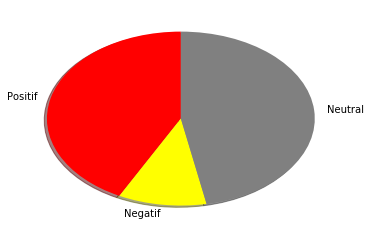

In [91]:
colors = ['red', 'yellow', 'grey']
sizes = [positif, negatif, neutral]
labels = 'Positif', 'Negatif', 'Neutral'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.show()